In [120]:
#Importing the Libraries
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
import sklearn.datasets as datasets
from matplotlib.colors import rgb2hex
from matplotlib.cm import get_cmap

Loading the Dataset from local machine

In [121]:
dataset= pd.read_csv("C:\\Users\\pc\\Documents\\ML and DL\\Project2\\data-1.csv") # loading the gene dataset

In [122]:
dataset.head(10).round(2) # printing he first two 10 coloumns and rows data

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.02,3.27,5.48,10.43,0.0,7.18,0.59,0.0,...,4.93,8.21,9.72,7.22,9.12,12.00,9.65,8.92,5.29,0.0
1,sample_1,0.0,0.59,1.59,7.59,9.62,0.0,6.82,0.00,0.0,...,4.59,7.32,9.74,6.26,8.38,12.67,10.52,9.40,2.09,0.0
2,sample_2,0.0,3.51,4.33,6.88,9.87,0.0,6.97,0.45,0.0,...,5.13,8.13,10.91,5.40,9.91,9.05,9.79,10.09,1.68,0.0
3,sample_3,0.0,3.66,4.51,6.66,10.20,0.0,7.84,0.43,0.0,...,6.08,8.79,10.14,8.94,9.60,11.39,9.69,9.68,3.29,0.0
4,sample_4,0.0,2.66,2.82,6.54,9.74,0.0,6.57,0.36,0.0,...,6.00,8.89,10.37,7.18,9.85,11.92,9.22,9.46,5.11,0.0
5,sample_5,0.0,3.47,3.58,6.62,9.71,0.0,7.76,0.00,0.0,...,5.73,8.60,9.93,6.10,9.82,11.56,9.24,9.84,5.36,0.0
6,sample_6,0.0,1.22,1.69,6.57,9.64,0.0,6.75,0.53,0.0,...,5.11,7.93,9.67,1.88,9.80,13.26,9.66,9.24,8.33,0.0
7,sample_7,0.0,2.85,1.75,7.23,9.76,0.0,5.95,0.00,0.0,...,5.30,8.28,9.60,5.24,9.99,12.67,9.99,9.22,6.55,0.0
8,sample_8,0.0,3.99,2.77,6.55,10.49,0.0,7.69,0.35,0.0,...,6.72,9.60,9.76,7.93,10.95,12.50,10.39,10.39,7.83,0.0
9,sample_9,0.0,3.64,4.42,6.85,9.46,0.0,7.95,0.72,0.0,...,6.02,8.71,10.26,6.13,9.92,11.14,9.24,9.48,4.76,0.0


In [123]:
dataset = dataset.drop(columns = ["Unnamed: 0"]) # Drop the Unnamed Coloumn

In [124]:
dataset.columns = dataset.columns.str.replace("gene_", "gen ") #remame the gene_ to gen

In [125]:
starting=dataset.describe()[dataset.describe().columns[0:9]].round(2) # Describing te dataset
pd.DataFrame(starting)

,gen 0,gen 1,gen 2,gen 3,gen 4,gen 5,gen 6,gen 7,gen 8
count,801.00,801.00,801.00,801.00,801.00,801.0,801.00,801.00,801.00
mean,0.03,3.01,3.10,6.72,9.81,0.0,7.41,0.50,0.02
std,0.14,1.20,1.07,0.64,0.51,0.0,1.11,0.51,0.13
min,0.00,0.00,0.00,5.01,8.44,0.0,3.93,0.00,0.00
25%,0.00,2.30,2.39,6.30,9.46,0.0,6.68,0.00,0.00
50%,0.00,3.14,3.13,6.66,9.79,0.0,7.45,0.44,0.00
75%,0.00,3.88,3.80,7.04,10.14,0.0,8.12,0.79,0.00
max,1.48,6.24,6.06,10.13,11.36,0.0,10.72,2.78,1.79


In [126]:
checknull = dataset.isnull().sum().sort_values(ascending = False) #Checking the wheather dataset contains the null values or not
checknull.head(5)

gen 0        0
gen 13794    0
gen 13692    0
gen 13691    0
gen 13690    0
dtype: int64

In [127]:
missingvalues = dataset.isna().sum().sort_values(ascending = False)#used to store the count of missing values (NaN) in each column of the dataset.
missingvalues.head(5)

gen 0        0
gen 13794    0
gen 13692    0
gen 13691    0
gen 13690    0
dtype: int64


Standardization :It is  important in data preprocessing because it ensures that all features have a mean of 0 and a standard deviation of 1, which helps algorithms converge faster and prevents features with larger scales from dominating those with smaller scales.

In [128]:
scaled_data = np.asarray(dataset)#Standerize before applying K-Means
scaled_data = StandardScaler().fit_transform(scaled_data)

In [129]:
data_frame_sc = pd.DataFrame(scaled_data, columns = dataset.columns) ## Assuming scaled_data is your standardized data and dataset.columns are the original column names
data_frame_sc.head().round(2)

,gen 0,gen 1,gen 2,gen 3,gen 4,gen 5,gen 6,gen 7,gen 8,gen 9,...,gen 20521,gen 20522,gen 20523,gen 20524,gen 20525,gen 20526,gen 20527,gen 20528,gen 20529,gen 20530
0,-0.19,-0.83,0.16,-1.95,1.22,0.0,-0.21,0.18,-0.13,-0.07,...,-1.30,-0.92,-0.88,1.00,-1.17,0.39,-0.87,-1.19,-0.12,-0.26
1,-0.19,-2.02,-1.42,1.35,-0.38,0.0,-0.53,-0.98,-0.13,-0.07,...,-1.75,-2.39,-0.83,0.59,-2.55,1.39,0.62,-0.34,-1.66,-0.26
2,-0.19,0.42,1.16,0.25,0.11,0.0,-0.39,-0.09,-0.13,-0.07,...,-1.03,-1.06,2.25,0.23,0.32,-4.03,-0.63,0.89,-1.86,-0.26
3,-0.19,0.54,1.33,-0.10,0.76,0.0,0.40,-0.13,-0.13,-0.07,...,0.24,0.04,0.22,1.72,-0.26,-0.52,-0.79,0.17,-1.08,-0.26
4,-0.19,-0.30,-0.26,-0.29,-0.15,0.0,-0.76,-0.27,-0.13,-0.07,...,0.13,0.21,0.84,0.98,0.20,0.27,-1.62,-0.23,-0.20,-0.26


In [130]:
x = data_frame_sc.describe()[data_frame_sc.describe().columns[0:9]].round(2)
# Convert the DataFrame 'x' into another DataFrame to ensure proper display of the descriptive statistics
# Display the descriptive statistics of the first 9 columns of the standardized data
pd.DataFrame(x)



,gen 0,gen 1,gen 2,gen 3,gen 4,gen 5,gen 6,gen 7,gen 8
count,801.00,801.00,801.00,801.00,801.00,801.0,801.00,801.00,801.00
mean,0.00,-0.00,0.00,0.00,-0.00,0.0,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,0.0,1.00,1.00,1.00
min,-0.19,-2.51,-2.91,-2.68,-2.72,0.0,-3.14,-0.98,-0.13
25%,-0.19,-0.59,-0.66,-0.66,-0.69,0.0,-0.66,-0.98,-0.13
50%,-0.19,0.11,0.03,-0.10,-0.04,0.0,0.04,-0.11,-0.13
75%,-0.19,0.73,0.66,0.50,0.65,0.0,0.65,0.57,-0.13
max,10.64,2.69,2.79,5.34,3.05,0.0,2.99,4.48,13.24


Data Pre-Processing : Perform dimensionality reduction techniques like PCA to reduce the number of features while retaining important information.This  technique to transform a large set of variables into a smaller one .

In [131]:
# Perform Principal Component Analysis (PCA) on the standardized data
# Create a PCA object
pca = PCA()

# Fit the PCA model to the standardized data and transform the data into the new PCA space
data_pca = pca.fit_transform(scaled_data)

# Print the shape of the transformed data to inspect the dimensions
np.shape(data_pca)


(801, 801)

Text(0, 0.5, 'Cumulative Variance Explained [%]')

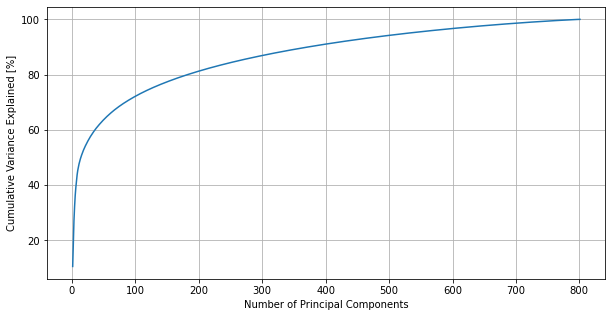

In [132]:
fig_variance, ax = plt.subplots(figsize = (10,5))
ax.plot(np.arange(1, len(pca.explained_variance_ratio_)+1),
100*np.cumsum(pca.explained_variance_ratio_), label = 'cumulative variance')
ax.grid()
ax.set_xlabel("Number of Principal Components")
ax.set_ylabel("Cumulative Variance Explained [%]")


In [133]:
import matplotlib.pyplot as plt

def scatterPlot(x, y, colors, algoName="", xlabel="", ylabel="", size=(5.75, 4), show_legend=False):
    plt.figure(figsize=size)
    scatter = plt.scatter(x, y, c=colors)
    plt.title('Scatter Plot')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if show_legend:
        plt.legend(*scatter.legend_elements())
    plt.show()


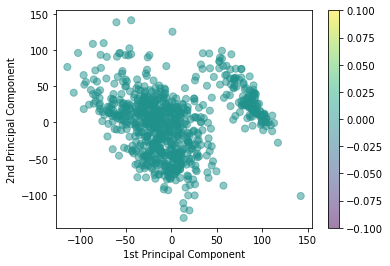

In [134]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define your scatter plot function
def scatterPlot(x, y, labels, title, size=(8, 6)):
    plt.figure(figsize=size)
    plt.scatter(x, y, c=labels, cmap='viridis', s=50, alpha=0.5)
    plt.xlabel('1st Principal Component')  # Define your x-axis label here
    plt.ylabel('2nd Principal Component')  # Define your y-axis label here
    plt.colorbar()
    plt.show()

# Assuming you have data_pca defined
x_pca, y_pca = data_pca[:, 0], data_pca[:, 1]

# Plot the 2D scatter plot
scatterPlot(x_pca, y_pca, np.zeros(801), "", size=(5.75, 4))


T-sne is used  when visualizing high-dimensional data in a lower-dimensional space, typically 2D or 3D.

In [135]:
from sklearn.manifold import TSNE
tsne = TSNE(perplexity = 40, n_iter = 1000, metric = 'euclidean')
data_tsne = tsne.fit_transform(data_pca[:,0:30])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


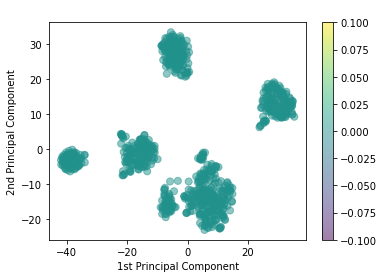

In [161]:
import matplotlib.pyplot as plt

# Define your scatter plot function
def scatterPlot(x, y, labels, title, size=(8, 6), algoName="", show_legend=True):
    plt.figure(figsize=size)
    plt.scatter(x, y, c=labels, cmap='viridis', s=50, alpha=0.5)
    plt.xlabel('1st Principal Component')  # Define your x-axis label here
    plt.ylabel('2nd Principal Component')  # Define your y-axis label here
    plt.colorbar()
    plt.title(title)
    if not show_legend:
        plt.legend().remove()  # If show_legend is False, remove the legend
    plt.show()

x_tsne, y_tsne = data_tsne[:, 0], data_tsne[:, 1]

# Plot the scatter plot
scatterPlot(x_tsne, y_tsne, np.zeros(801), " ", size=(5.75, 4), algoName=" ", show_legend=False)


Optimum number of clusters :The elbow method helps determine the optimal number of clusters by identifying the point where the rate of decrease in inertia (sum of squared distances within clusters) sharply changes.

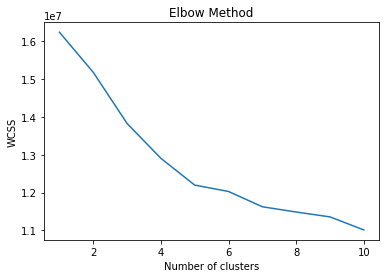

In [137]:
# Select only numeric columns for clustering
numeric_dataset = data_pca # elbow method is used to find the number of clusters

# Apply KMeans clustering
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(numeric_dataset)
    wcss.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [138]:
# Calculate the differences between consecutive WCSS values
diffs = np.diff(wcss)

# Calculate the percentage change in WCSS
percent_change = (diffs[:-1] / diffs[1:]) * 100

# Find the index corresponding to the maximum percentage change
optimal_num_clusters = np.argmax(percent_change) +2 # Add 2 because range starts from 1

# Print the optimal number of clusters
print("Optimal number of clusters:", optimal_num_clusters)


Optimal number of clusters: 5


Selection of Clustering: found that k=5 clusters improve graphs and understanding, making k-means clustering the best option for this dataset.

In [139]:
pca.explained_variance_ratio_[1] #print the variance

0.08754232469325529

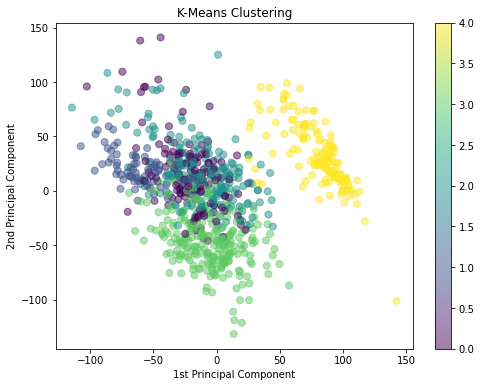

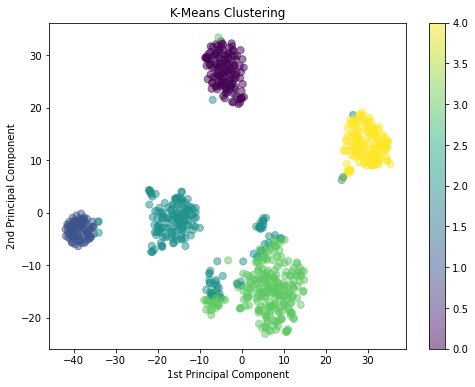

In [160]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define your scatter plot function
def scatterPlot(x, y, labels, title, size=(8, 6)):
    plt.figure(figsize=size)
    plt.scatter(x, y, c=labels, cmap='viridis', s=50, alpha=0.5)
    plt.title("K-Means Clustering")  
    plt.xlabel('1st Principal Component')  # Define your x-axis label here
    plt.ylabel('2nd Principal Component')  # Define your y-axis label here
    plt.colorbar()
    plt.show()

# Algorytm K-Means Algorithm
optimum_k = 5 #optimum number of clusters will be 5 according to elbow method
kmeans = KMeans(optimum_k, random_state=42).fit(data_pca)

# Plot using PCA
scatterPlot(x_pca, y_pca, kmeans.labels_, "K-Means Algorithm with PCA", size=(8, 6))

# Plot using t-SNE
scatterPlot(x_tsne, y_tsne, kmeans.labels_, "K-Means Algorithm with t-SNE", size=(8, 6))


In [141]:
from sklearn.metrics import adjusted_rand_score #Printin the overall accuracy
true_label=pd.read_csv('C:\\Users\\pc\\Documents\\ML and DL\\Project2\\labels.csv')['Class']
Accuracy = adjusted_rand_score(true_label, kmeans.labels_)
print("Over-all Accuracy", Accuracy)

Over-all Accuracy 0.797191727212985


In [142]:
kmeans.labels_ #print the kmeans.labels

array([0, 2, 0, 0, 3, 0, 4, 0, 3, 0, 3, 4, 0, 2, 3, 3, 2, 4, 4, 0, 3, 4,
       2, 3, 4, 2, 1, 3, 2, 3, 3, 3, 4, 2, 0, 3, 4, 2, 3, 2, 4, 0, 0, 4,
       4, 3, 0, 1, 3, 2, 3, 2, 3, 0, 1, 2, 3, 1, 4, 3, 2, 2, 3, 2, 0, 1,
       3, 0, 4, 2, 4, 3, 2, 2, 3, 2, 3, 2, 0, 1, 3, 0, 3, 3, 0, 0, 3, 3,
       4, 2, 0, 0, 3, 2, 3, 0, 1, 3, 0, 3, 3, 4, 3, 4, 2, 4, 2, 1, 2, 2,
       0, 3, 2, 0, 3, 4, 4, 4, 3, 3, 2, 4, 2, 3, 0, 0, 0, 3, 4, 3, 1, 2,
       1, 3, 3, 4, 2, 3, 4, 1, 3, 0, 3, 4, 2, 1, 0, 3, 2, 2, 2, 2, 3, 3,
       2, 3, 3, 0, 0, 2, 0, 2, 4, 3, 0, 2, 1, 4, 2, 3, 4, 2, 3, 2, 3, 2,
       3, 0, 3, 4, 1, 4, 3, 0, 0, 0, 2, 2, 3, 2, 2, 4, 2, 0, 2, 3, 2, 3,
       2, 2, 3, 4, 4, 4, 4, 0, 2, 0, 2, 2, 2, 3, 0, 3, 0, 3, 3, 3, 2, 3,
       4, 2, 4, 4, 2, 3, 4, 0, 3, 2, 2, 0, 1, 2, 4, 0, 4, 1, 2, 4, 4, 2,
       0, 2, 2, 2, 4, 3, 3, 1, 3, 0, 2, 3, 0, 4, 0, 0, 0, 3, 1, 1, 2, 1,
       1, 0, 2, 3, 3, 4, 4, 3, 1, 0, 4, 0, 3, 3, 4, 3, 3, 3, 2, 2, 2, 3,
       3, 3, 4, 4, 4, 4, 2, 3, 3, 4, 3, 3, 2, 0, 3,

In [143]:
from collections import Counter
# the collections module to count the occurrences of each cluster label obtained from k-means clustering
cluster_counts = Counter(kmeans.labels_)
print("Cluster Distribution:")
for cluster, count in cluster_counts.items():
    print(f"Cluster {cluster}: {count} samples")

Cluster Distribution:
Cluster 0: 134 samples
Cluster 2: 198 samples
Cluster 3: 252 samples
Cluster 4: 143 samples
Cluster 1: 74 samples


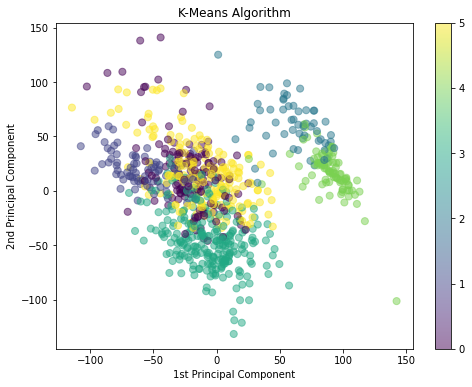

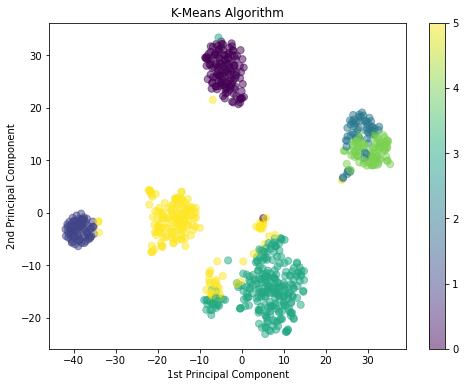

In [144]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define your scatter plot function
def scatterPlot(x, y, labels, title, size=(8, 6)):
    plt.figure(figsize=size)
    plt.scatter(x, y, c=labels, cmap='viridis', s=50, alpha=0.5)
    plt.title("K-Means Algorithm")  
    plt.xlabel('1st Principal Component')  # Define your x-axis label here
    plt.ylabel('2nd Principal Component')  # Define your y-axis label here
    plt.colorbar()
    plt.show()

# Algorytm K-Means Algorithm
optimum_k = 6  #If we take the optimal number of clusters to be 6 for comparing the quality of cluster labels
kmeans = KMeans(optimum_k, random_state=42).fit(data_pca)

# Plot using PCA
scatterPlot(x_pca, y_pca, kmeans.labels_, "K-Means Algorithm with PCA", size=(8, 6))

# Plot using t-SNE
scatterPlot(x_tsne, y_tsne, kmeans.labels_, "K-Means Algorithm with t-SNE", size=(8, 6))


In [145]:
from sklearn.metrics import adjusted_rand_score # print the overall accuracy when k=6
label=pd.read_csv('C:\\Users\\pc\\Documents\\ML and DL\\Project2\\labels.csv')['Class']
Accuracy = adjusted_rand_score(label, kmeans.labels_)
print("Over-all Accuracy", Accuracy)

Over-all Accuracy 0.7659395453841109


In [147]:
from collections import Counter
# the collections module to count the occurrences of each cluster label obtained from k-means clustering
cluster_counts = Counter(kmeans.labels_)
print("Cluster Distribution:")
for cluster, count in cluster_counts.items():
    print(f"Cluster {cluster}: {count} samples")

Cluster Distribution:
Cluster 0: 135 samples
Cluster 5: 191 samples
Cluster 3: 256 samples
Cluster 2: 57 samples
Cluster 4: 88 samples
Cluster 1: 74 samples


For number_of_cluster =5 gives 80% accuracy where as number_of_clusters=6 gives the 76% accuracy, so optimal number clusters will be 5.

In [148]:
def plotDendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1 # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [149]:
import matplotlib.pyplot as plt

def scatterPlot(x, y, colors, algoName="", xlabel="", ylabel="", size=(5.75, 4), show_legend=False):
    plt.figure(figsize=size)
    scatter = plt.scatter(x, y, c=colors)
    plt.title('Scatter Plot')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if show_legend:
        plt.legend(*scatter.legend_elements())
    plt.show()

agglomerative hierarchical clustering using the Ward linkage method

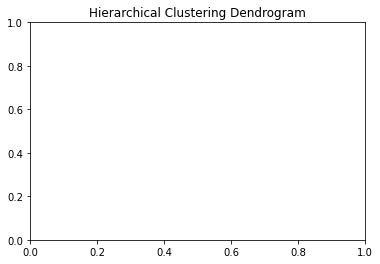

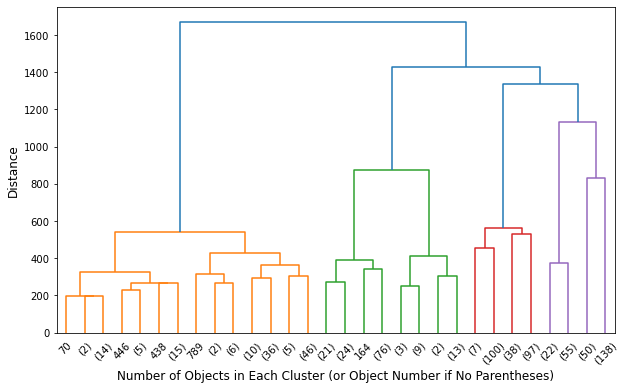

In [157]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
# Perform agglomerative hierarchical clustering
agglomarative = AgglomerativeClustering(distance_threshold=800, n_clusters=None,linkage = 'ward',).fit(data_pca)
# plot the top three levels of the dendrogram
plt.title('Hierarchical Clustering Dendrogram')
plt.figure(figsize = (10,6))
plt.xlabel("Number of Objects in Each Cluster (or Object Number if No Parentheses)", fontsize=12)
plt.ylabel("Distance", fontsize=12)
plt.xticks(fontsize = 12)

# Plot the dendrogram using a custom function (plotDendrogram)
plotDendrogram(agg, truncate_mode='level', p=4)

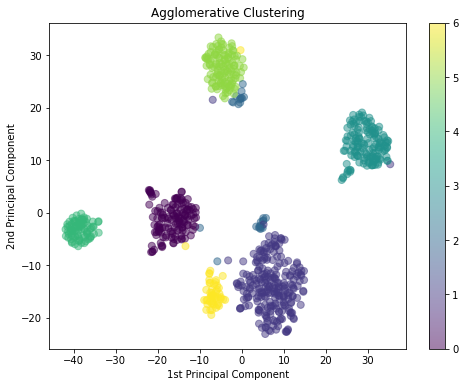

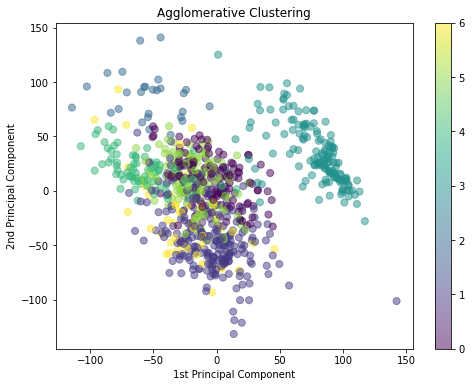

In [158]:
import matplotlib.pyplot as plt

# Define your scatter plot function
def scatterPlot(x, y, labels, title, size=(8, 6)):
    plt.figure(figsize=size)
    plt.scatter(x, y, c=labels, cmap='viridis', s=50, alpha=0.5)
    plt.title(title)  
    plt.xlabel('1st Principal Component')  # Define your x-axis label here
    plt.ylabel('2nd Principal Component')  # Define your y-axis label here
    plt.colorbar()
    plt.show()
scatterPlot(x_tsne, y_tsne, agg.labels_,"Agglomerative Clustering") # plot satter plot
scatterPlot(x_pca, y_pca, agg.labels_,"Agglomerative Clustering")

In [159]:
# Evaluate clustering accuracy using Adjusted Rand Index
true_labels_int=pd.read_csv('C:\\Users\\pc\\Documents\\ML and DL\\Project2\\labels.csv')['Class']
accuracy = adjusted_rand_score(true_labels_int,  agg.labels_)
print("Adjusted Rand Index:", accuracy)

Adjusted Rand Index: 0.826168054043651


Comparing to K-Means clustering algomarive hierarchical clustering gives good accuracy i.e 82 %.

In [153]:
agg.labels_ #Printing the labels

array([2, 0, 6, 5, 1, 5, 3, 5, 6, 5, 1, 3, 5, 2, 1, 1, 0, 3, 3, 5, 1, 3,
       0, 1, 3, 0, 4, 1, 6, 6, 1, 1, 3, 2, 5, 1, 3, 0, 1, 2, 3, 5, 5, 3,
       3, 1, 2, 4, 1, 0, 1, 0, 6, 5, 4, 6, 1, 4, 3, 1, 0, 3, 1, 0, 5, 4,
       1, 5, 3, 6, 3, 1, 1, 0, 6, 0, 1, 3, 5, 4, 1, 5, 1, 1, 2, 5, 1, 1,
       3, 6, 5, 5, 1, 2, 1, 5, 4, 1, 5, 1, 1, 3, 1, 3, 0, 3, 0, 4, 0, 0,
       2, 1, 0, 5, 1, 3, 3, 3, 1, 1, 0, 3, 0, 1, 5, 5, 5, 1, 3, 6, 4, 6,
       4, 1, 1, 3, 0, 1, 3, 4, 1, 5, 1, 3, 0, 4, 2, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 5, 5, 0, 2, 0, 3, 1, 5, 0, 4, 3, 0, 1, 3, 0, 1, 0, 1, 1,
       1, 5, 1, 3, 4, 3, 1, 5, 5, 5, 0, 0, 1, 0, 0, 3, 0, 5, 0, 1, 2, 1,
       0, 0, 1, 3, 3, 3, 3, 5, 6, 5, 1, 0, 0, 1, 5, 1, 5, 1, 1, 1, 0, 1,
       3, 0, 3, 3, 0, 1, 3, 5, 1, 0, 2, 5, 4, 2, 3, 5, 3, 4, 6, 3, 3, 0,
       5, 1, 0, 0, 3, 1, 6, 4, 6, 5, 4, 1, 5, 3, 2, 5, 5, 1, 4, 4, 0, 4,
       4, 5, 0, 6, 1, 3, 3, 1, 4, 2, 3, 5, 1, 1, 3, 1, 6, 6, 2, 0, 0, 1,
       1, 1, 3, 3, 3, 3, 2, 1, 1, 3, 1, 1, 0, 5, 1,